In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('dataset/Zameen Property Data.csv')

In [3]:
from pre_poccess import pre_poccess
    

pp_data = pre_poccess(data)
print(len(pp_data.index))
pp_data = pp_data.drop(pp_data[(pp_data['property_type'] == "Room") | (pp_data['property_type'] == "Penthouse") |  (pp_data['property_type'] == "Farm House")].index)
pp_data['property_type'][pp_data['property_type'] =='Upper Portion'] = "Portion"
pp_data['property_type'][pp_data['property_type'] == 'Lower Portion'] = "Portion"
print(len(pp_data.index))


145742


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Faraz Ahmed Khan\OneDrive - Habib University\semester 7\DS\final_project\final\Zameen-Data-exploratory-Analysis\pre_poccess.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_z_score'][dataset['purpose'] == 'For Sale'] = z_score
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

date done
145618
pre-poccessed successfully.
145618
144476


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
print(pp_data.head(5))

  property_type     price     location       city      province_name  \
0          Flat  10000000         G-10  Islamabad  Islamabad Capital   
1          Flat   6900000         E-11  Islamabad  Islamabad Capital   
2         House  16500000         G-15  Islamabad  Islamabad Capital   
3         House  43500000    Bani Gala  Islamabad  Islamabad Capital   
4         House   7000000  DHA Defence  Islamabad  Islamabad Capital   

    latitude  longitude  baths    area   purpose  bedrooms date_added  \
0  33.679890  73.012640      2   100.0  For Sale         2 2019-02-04   
1  33.700993  72.971492      3   140.0  For Sale         3 2019-05-04   
2  33.631486  72.926559      6   200.0  For Sale         5 2019-07-17   
3  33.707573  73.151199      4  1000.0  For Sale         4 2019-04-05   
4  33.492591  73.301339      3   200.0  For Sale         3 2019-07-10   

          agency        unique_location  price_per_area  price_z_score  
0     Individual         G-10 Islamabad   100000.000000

##Q2
Analyzing the recovery period of rent with respect to the selling price of a property

For Sale    106963
For Rent     37513
Name: purpose, dtype: int64


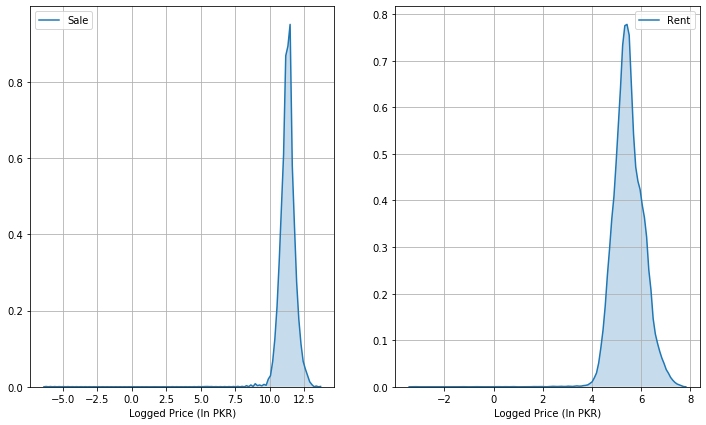

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


##checking if data contains any anaomly 
print(pp_data['purpose'].value_counts())

# Share a Y axis with each row of subplots
fig, ax = plt.subplots(1, 2, figsize = (12, 7))

sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Sale']), shade = True, ax = ax[0], label = "Sale")
sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Rent']), shade = True, ax = ax[1], label = "Rent")
ax[0].set_xlabel("Logged Price (In PKR)")
ax[1].set_xlabel("Logged Price (In PKR)")
ax[0].grid();ax[1].grid();
plt.show()

There appears to be a clear relation between both prices. Both follow a bimodal distribution.

In [6]:
## computing rent per area
location_sale_rent = {}
for i, row in pp_data.iterrows():
    location = row['unique_location'].strip().lower()
    price_per_area = row['price_per_area']
    purpose = row['purpose']
    if location not in location_sale_rent:
        location_sale_rent[location] = {'For Sale':[], 'For Rent':[]}
    location_sale_rent[location][purpose].append(price_per_area)

In [7]:
print(len(location_sale_rent))
mean_loc_sale_rent = {}

#computing mean rent per area
for i in location_sale_rent:
    for_sale = location_sale_rent[i]['For Sale']
    for_rent = location_sale_rent[i]['For Rent']
    if (len(for_sale) + len(for_rent)) >= 0 and len(for_sale) > 0 and len(for_rent) > 0:
        if i not in mean_loc_sale_rent:
            mean_loc_sale_rent[i] = {'sale': 0, 'rent' : 0, 'city':''}
        mean_loc_sale_rent[i]['sale'] = np.mean(for_sale)
        mean_loc_sale_rent[i]['rent'] = np.mean(for_rent)
        mean_loc_sale_rent[i]['city'] = i.split()[-1].capitalize()
        #for a partiular location, the dictionary holds the mean rent and sale price
            
print(len(mean_loc_sale_rent))
mean_location = pd.DataFrame.from_dict(mean_loc_sale_rent, orient = 'index')
mean_location['ratio_per_month'] = np.floor(mean_location['sale'] / mean_location['rent'], dtype = 'float64')
mean_location['ratio_per_year'] = (mean_location['ratio_per_month']/12)



mean_location.head(10)

1539
545


,sale,rent,city,ratio_per_month,ratio_per_year
g-10 islamabad,127055.868629,276.275888,Islamabad,459.0,38.250000
e-11 islamabad,109492.071479,330.342832,Islamabad,331.0,27.583333
g-15 islamabad,72481.624132,192.703404,Islamabad,376.0,31.333333
bani gala islamabad,60754.509271,151.817360,Islamabad,400.0,33.333333
dha defence islamabad,62812.532723,158.795754,Islamabad,395.0,32.916667
ghauri town islamabad,69987.972311,169.681040,Islamabad,412.0,34.333333
korang town islamabad,64632.491484,152.521836,Islamabad,423.0,35.250000
diplomatic enclave islamabad,194558.954809,822.279687,Islamabad,236.0,19.666667
b-17 islamabad,62074.557139,181.678173,Islamabad,341.0,28.416667
g-11 islamabad,123151.002533,280.434778,Islamabad,439.0,36.583333


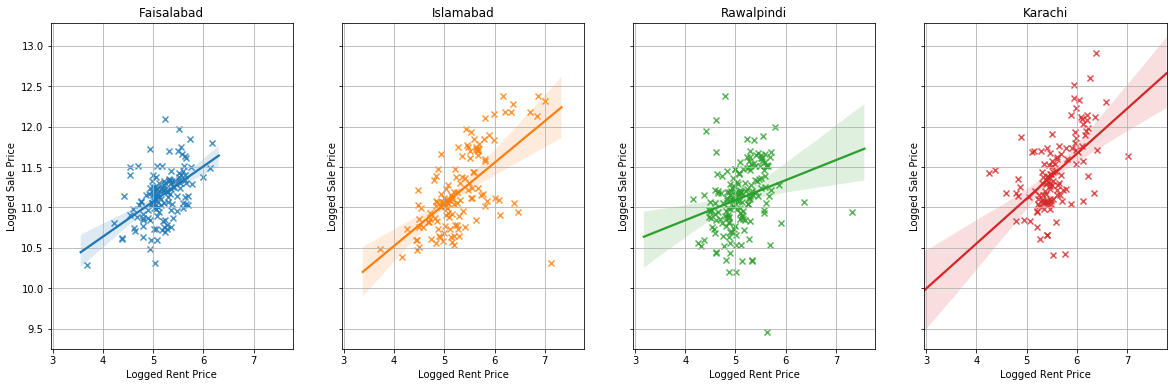

In [8]:
mean_location['logged_sale'] = np.log(mean_location['sale'])
mean_location['logged_rent'] = np.log(mean_location['rent'])


cities = list(set(mean_location['city']))
fig, ax = plt.subplots(1, 4, sharex = True, sharey = True, figsize = (20, 6))
count = 0
for i in cities:
    #sns.kdeplot(data = mean_location[['logged_rent', 'logged_sale']][mean_location['city'] == i], ax = ax[count], thresh = 0.0)
    #sns.scatterplot( x = mean_location['logged_sale'][mean_location['city'] == i], y = mean_location['logged_rent'][mean_location['city'] == i], ax = ax[count])
    sns.regplot( y = mean_location['logged_sale'][mean_location['city'] == i], x = mean_location['logged_rent'][mean_location['city'] == i], ax = ax[count], marker = 'x')
    ax[count].set_title(i)
    ax[count].set_xlabel("Logged Rent Price")
    ax[count].set_ylabel("Logged Sale Price")
    ax[count].grid()
    count += 1
plt.show()
    

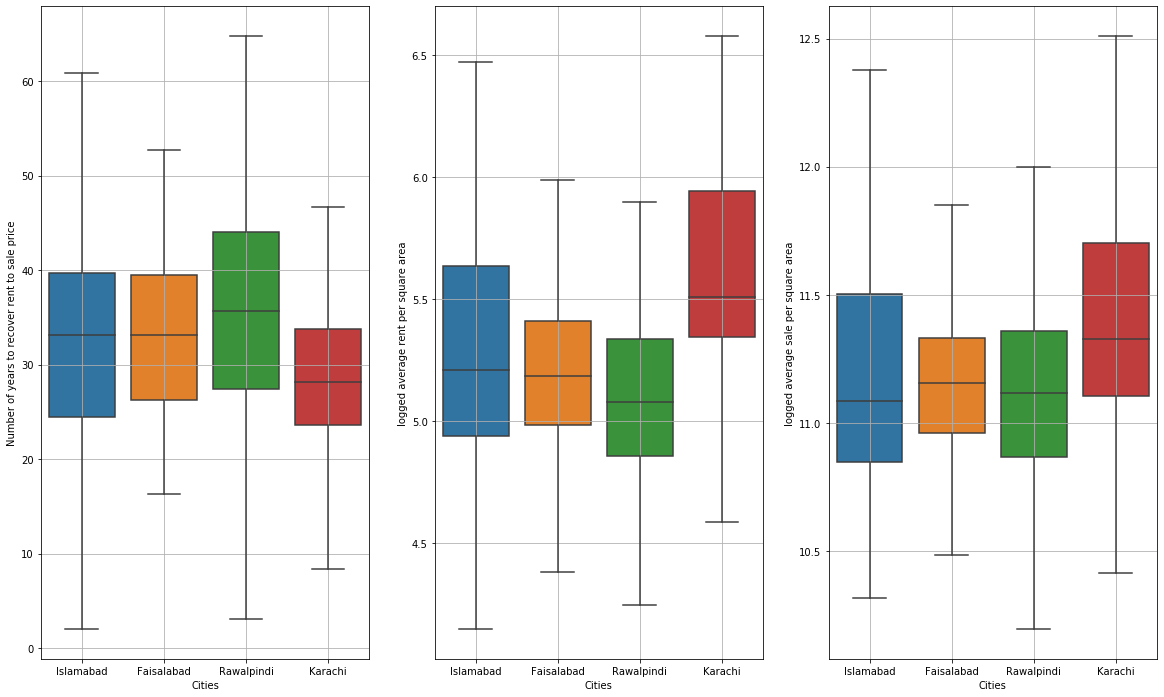

In [9]:
mean_location = mean_location.drop(mean_location[(mean_location['ratio_per_year'] < 2) | (mean_location['ratio_per_year'] > 80)].index)


fig, ax = plt.subplots(1, 3,figsize = (20, 12))
sns.boxplot(y = 'ratio_per_year', x = 'city', data = mean_location, showfliers=False, ax = ax[0])
ax[0].set_xlabel('Cities')
ax[0].set_ylabel("Number of years to recover rent to sale price")
ax[0].grid()

sns.boxplot(y = np.log(mean_location['rent']), x = mean_location['city'], showfliers=False, ax = ax[1])
ax[1].set_xlabel('Cities')
ax[1].set_ylabel("logged average rent per square area")
ax[1].grid()

sns.boxplot(y = np.log(mean_location['sale']), x = mean_location['city'], showfliers=False, ax = ax[2])
ax[2].set_xlabel('Cities')
ax[2].set_ylabel("logged average sale per square area")
ax[2].grid()

plt.show()

#Q3 The factor on which price depends the most

In [10]:
print(pp_data.head(10))

   property_type     price            location       city      province_name  \
0           Flat  10000000                G-10  Islamabad  Islamabad Capital   
1           Flat   6900000                E-11  Islamabad  Islamabad Capital   
2          House  16500000                G-15  Islamabad  Islamabad Capital   
3          House  43500000           Bani Gala  Islamabad  Islamabad Capital   
4          House   7000000         DHA Defence  Islamabad  Islamabad Capital   
5          House  34500000         Ghauri Town  Islamabad  Islamabad Capital   
6          House  27000000         Korang Town  Islamabad  Islamabad Capital   
7           Flat   7800000                E-11  Islamabad  Islamabad Capital   
8          House  50000000         DHA Defence  Islamabad  Islamabad Capital   
10          Flat  35000000  Diplomatic Enclave  Islamabad  Islamabad Capital   

     latitude  longitude  baths    area   purpose  bedrooms date_added  \
0   33.679890  73.012640      2   100.0  For 

In [11]:
relevant_data = pp_data[['price', 'price_per_area', 'unique_location', 'city', 'area', 'bedrooms', 'purpose', 'property_type']].copy()

In [12]:
sale = relevant_data[relevant_data['purpose'] == 'For Sale']
rent = relevant_data[relevant_data['purpose'] == 'For Rent']

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer


#going with standard because we have massive outliears :(
min_max_scaler = preprocessing.StandardScaler()

sale['price'] = min_max_scaler.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
rent['price'] = min_max_scaler.fit_transform(np.reshape(rent['price'].values, (-1, 1)))


sale['price_per_area'] = min_max_scaler.fit_transform(np.reshape(sale['price_per_area'].values, (-1, 1)))
rent['price_per_area'] = min_max_scaler.fit_transform(np.reshape(rent['price_per_area'].values, (-1, 1)))

sale['area'] = min_max_scaler.fit_transform(np.reshape(sale['area'].values, (-1, 1)))
rent['area'] = min_max_scaler.fit_transform(np.reshape(rent['area'].values, (-1, 1)))

                     
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
sale['price_binned'] = binned
#print(sale['price_binned'].value_counts())

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(sale['area'].values, (-1, 1)))
sale['area_binned'] = binned

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(rent['price'].values, (-1, 1)))
rent['price_binned'] = binned
#print(sale['price_binned'].value_counts())

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(rent['area'].values, (-1, 1)))
rent['area_binned'] = binned





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns

#FTW https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


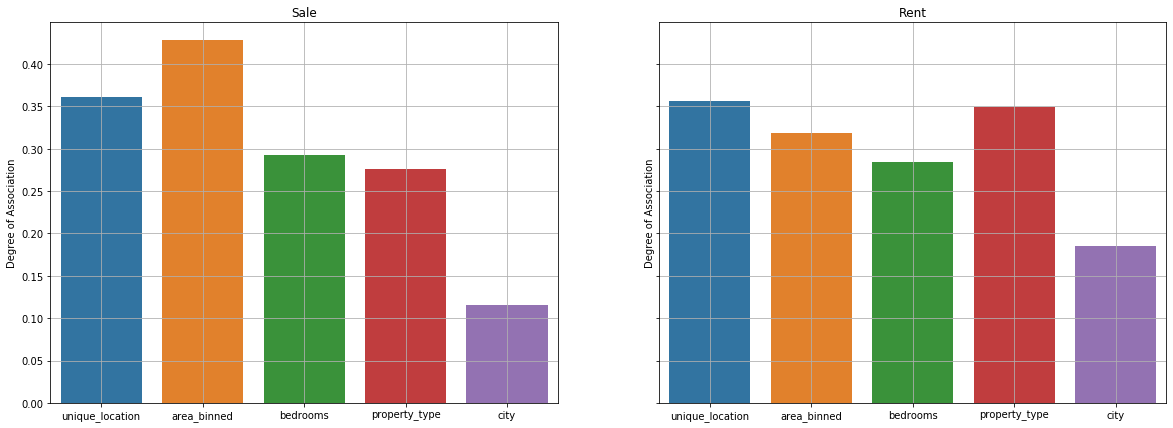

In [15]:
dfs = [sale, rent]
labels = ['Sale', 'Rent']
columns = ['unique_location', 'area_binned', 'bedrooms', 'property_type', 'city']


fig, ax = plt.subplots(1, 2, sharey = True, figsize = (20, 7))

for i in range(2):
    scores = []
    a = dfs[i]['price_binned']
    label = labels[i]
    for b in columns:
        b = dfs[i][b]
        scores.append(cramers_v(pd.crosstab(a, b).values))
        
    sns.barplot(x = columns, y = scores, ax = ax[i])
    ax[i].grid()
    ax[i].set_title(label)
    ax[i].set_ylabel("Degree of Association") 

##Q5: Trend for property type changing with time

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


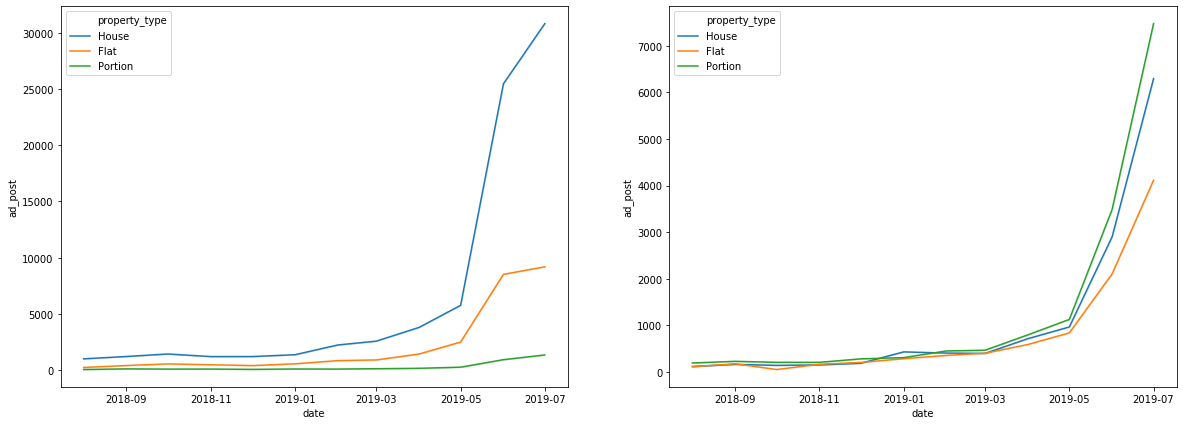

In [16]:
pp_data['date_added'] = pd.to_datetime(pp_data['date_added'])


relevant_data = pp_data[['price', 'price_per_area', 'city', 'purpose', 'property_type', 'date_added']].copy()

relevant_data['month'] = pd.DatetimeIndex(pp_data['date_added']).month
relevant_data['year'] = pd.DatetimeIndex(pp_data['date_added']).year
relevant_data['date'] = pd.to_datetime(relevant_data['month'].astype(str) + "-"+ relevant_data['year'].astype(str))
relevant_data['ad_post'] = 1


relevant_data.sort_values(by = ['date_added'], inplace = True)

sale = relevant_data[relevant_data['purpose'] == 'For Sale']
rent = relevant_data[relevant_data['purpose'] == 'For Rent']

hue_order = list(set(pp_data['property_type']))

fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.lineplot(x = 'date', y = 'ad_post', data = sale, hue = 'property_type', hue_order = hue_order, estimator = np.sum, markers = True, ax = ax[0])
plt.grid()

sns.lineplot(x = 'date', y = 'ad_post', data = rent, hue = 'property_type', hue_order = hue_order, estimator = np.sum, markers = True, ax = ax[1])
plt.grid()
plt.show()

##THIS MAKES US REALIZE THAT OUR ANALYSIS GOING FORWARD SHOULD BE TIME INDEPENDENT

types = list(set(relevant_data['property_type']))

sales_property_ratio = {}

for i, row in sale.iterrows():
    date = row['date']
    ptype = row['property_type']
    if date not in sales_property_ratio:
        sales_property_ratio[date] = {i:0 for i in types}
    if ptype in types:
        sales_property_ratio[date][ptype] += 1
    else:
        sales_property_ratio[date]["Other"] += 1
    
    
for i in sales_property_ratio:
    total = sum(list(sales_property_ratio[i].values()))
    for j in types:
        sales_property_ratio[i][j] /= total

    
rent_property_ratio = {}

for i, row in rent.iterrows():
    date = row['date']
    ptype = row['property_type']
    if date not in rent_property_ratio:
        rent_property_ratio[date] = {i:0 for i in types}
    if ptype in types:
        rent_property_ratio[date][ptype] += 1
    else:
        rent_property_ratio[date]["Other"] += 1
    
    
for i in rent_property_ratio:
    total = sum(list(rent_property_ratio[i].values()))
    for j in types:
        rent_property_ratio[i][j] /= total
    
        


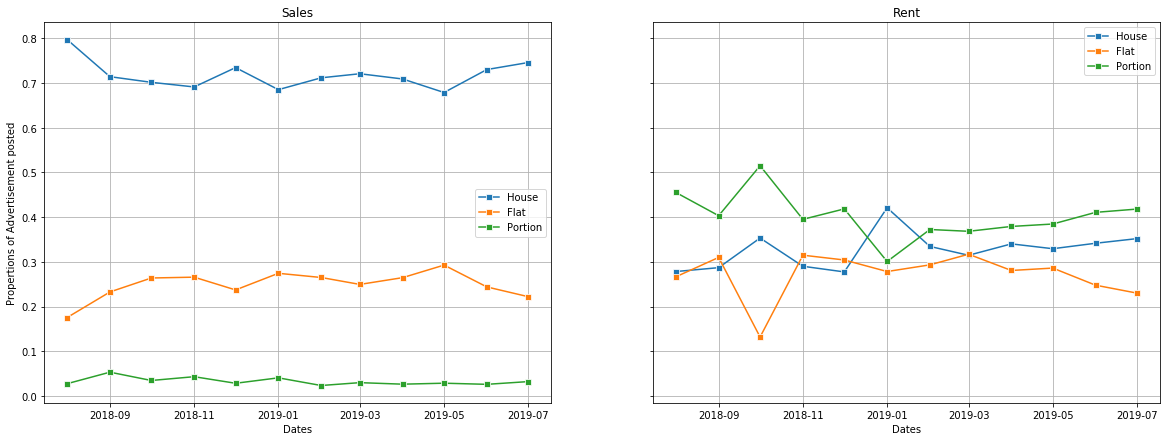

In [17]:
sales_property = pd.DataFrame.from_dict(sales_property_ratio, orient = 'index')
rents_property = pd.DataFrame.from_dict(rent_property_ratio, orient = 'index')
dfs = [(sales_property, "Sales"), (rents_property, "Rent")]
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20, 7))

for i in range(2):
    data = dfs[i][0]
    for ptype in types:
        if ptype == "Other":
            continue
        sns.lineplot(x = data.index, y = (data[ptype]), label = ptype, ax = ax[i], marker = 's')
    ax[i].legend()
    ax[i].grid()
    ax[i].set_title(dfs[i][1])
    ax[i].set_xlabel("Dates")
    ax[i].set_ylabel("Propertions of Advertisement posted")
plt.show()

## Difference in property type across sale and rent


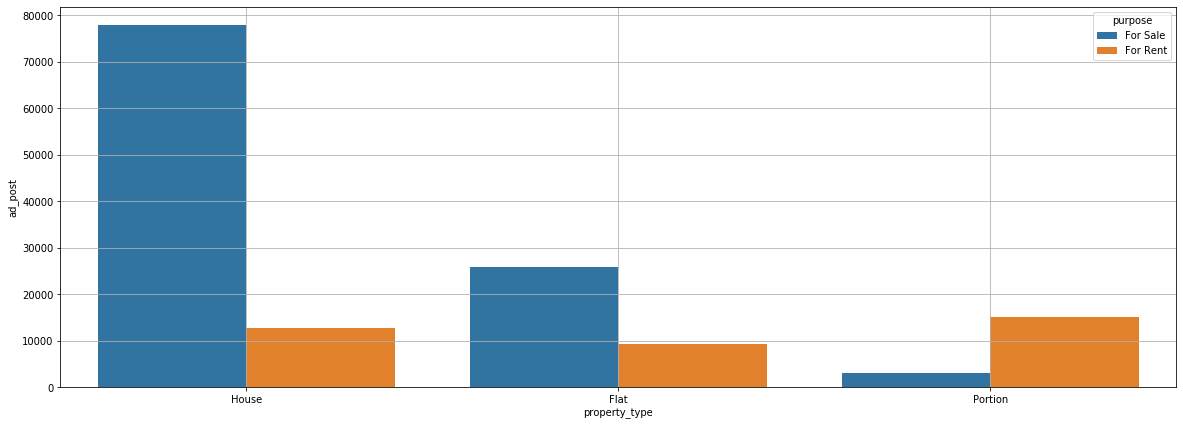

In [18]:
relevant_data = pp_data[['province_name', 'price', 'price_per_area', 'city', 'purpose', 'property_type', 'date_added', 'area']].copy()

relevant_data['month'] = pd.DatetimeIndex(pp_data['date_added']).month
relevant_data['year'] = pd.DatetimeIndex(pp_data['date_added']).year
relevant_data['date'] = pd.to_datetime(relevant_data['month'].astype(str) + "-"+ relevant_data['year'].astype(str))
relevant_data['ad_post'] = 1


relevant_data.sort_values(by = ['date_added'], inplace = True)
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot = sns.barplot(x = 'property_type', y = 'ad_post', hue = 'purpose', estimator = np.sum, data = relevant_data, ax = ax)
#plot.set(yscale = 'log')
plt.grid()
plt.show()

In [19]:
print(relevant_data.head(2))

      province_name     price  price_per_area    city   purpose property_type  \
12808        Punjab  26000000   104000.000000  Lahore  For Sale         House   
12135        Punjab  46500000    66428.571429  Lahore  For Sale         House   

      date_added   area  month  year       date  ad_post  
12808 2018-08-05  250.0      8  2018 2018-08-01        1  
12135 2018-08-05  700.0      8  2018 2018-08-01        1  


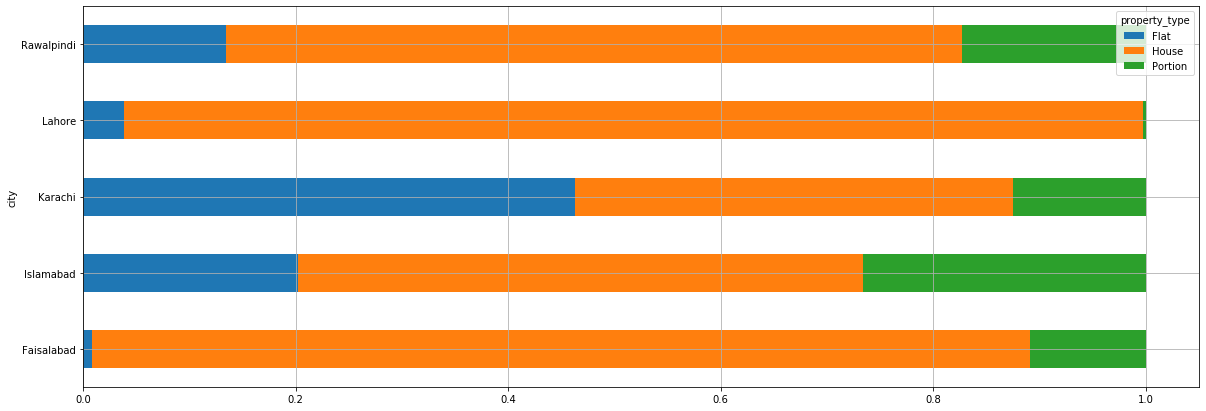

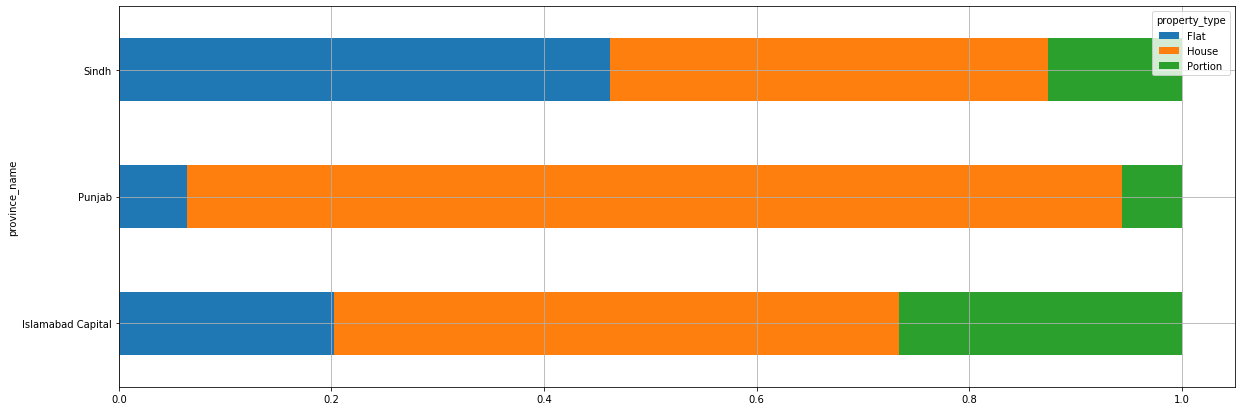

In [20]:
df_plot = relevant_data.groupby(['property_type', 'city']).size().reset_index().pivot(columns='property_type', index='city', values=0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.loc[:,"Flat":"Portion"].div(df_plot["sum"], axis=0)
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot.plot(kind='barh', stacked=True, ax = ax)
ax.grid()

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = relevant_data.groupby(['property_type', 'province_name']).size().reset_index().pivot(columns='property_type', index='province_name', values=0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.loc[:,"Flat":"Portion"].div(df_plot["sum"], axis=0)
df_plot.plot(kind='barh', stacked=True, ax = ax)
ax.grid()
plt.show()

Index(['property_type', 'province_name', 'For Rent', 'For Sale'], dtype='object', name='purpose')


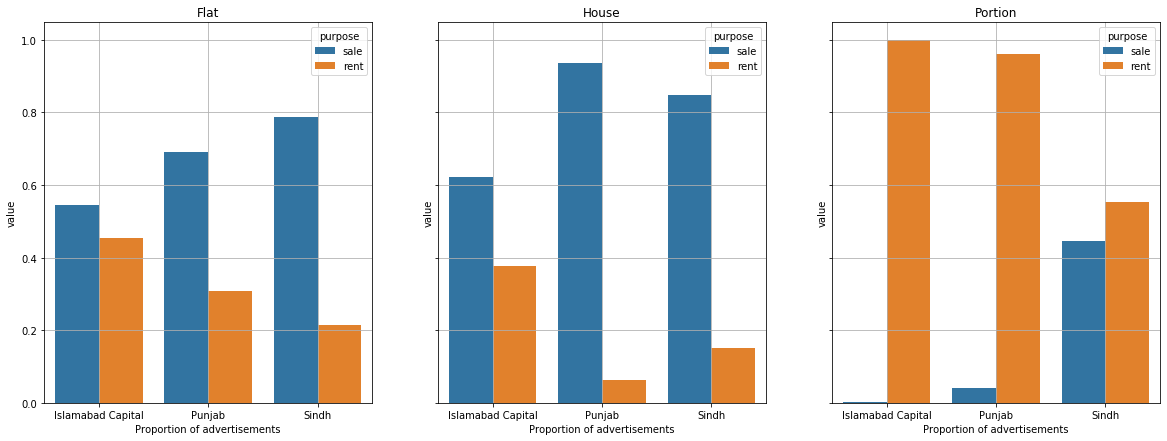

In [21]:
df_plot = relevant_data.groupby(['property_type', 'province_name', 'purpose']).size().reset_index()

dfout = df_plot.set_index(['property_type','province_name','purpose']).unstack()[0].reset_index()
print(dfout.columns)
dfout["sum"] = dfout.sum(axis=1)
dfout['sale'] = dfout['For Sale']/dfout['sum']
dfout['rent'] = dfout['For Rent']/dfout['sum']

df = pd.melt(dfout, id_vars=['property_type', 'province_name'], value_vars=['sale', 'rent'])

fig, ax = plt.subplots(1, 3, sharey = True, sharex = True, figsize = (20, 7))
count = 0
for i in df_plot['property_type'].unique():
    sns.barplot(x = 'province_name', y = 'value', hue = 'purpose', data = df[df['property_type'] == i], ax = ax[count])
    ax[count].set_title(i)
    ax[count].set_xlabel("Proportion of advertisements")
    ax[count].grid()
    count += 1
    



